# <div align="center">  Titanic Machine Learning Project Overview  </div>

# Background

### Titanic Disaster

### Kaggle

### Notebooks Referenced

#### - This note book is based on Jason Chong's Titanic: Machine Learning from Disaster tutoial notebook. An article explaining the notebook and the proccesses he used can be found [here] (https://towardsdatascience.com/comprehensive-beginners-guide-to-kaggle-titanic-survival-prediction-competition-solution-21c5be2cec2c). 
 
# Objective

### Determine factors that influenced the probability that an individual survived or perished.

### Build a model to predict who lived and who died based on the determined factors.

# Project Workflow

### Understand the data

#### - Data types
#### - Catagorical Vs Numerical 
#### - Missing values

### Exploratory Data Analysis

#### - Explore hypothesis
#### - Descriptive Statistics
#### - Correlation

### Data cleaning

#### - Deal with missing values
#### - Data transformation
#### - Feature engineering
#### - Label encoding

### Train Model

#### - Choose which models to train

### Evaluate models

#### - Cross validation
#### - Tune Model

### Show Final Results and Report Model Accuracy



In [224]:
#Main packages 
import pandas as pd
import numpy as np

#Visualization packages
import seaborn as sns
import matplotlib.pyplot as plt

#Dictionary Counter
from collections import Counter

#Machine learning packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import GaussianNB

#Model Testing and Tuning
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#Remove warnings 
import warnings
warnings.filterwarnings('ignore')

#Stats
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [225]:
#Importing the data set
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv") 

In [226]:
#First five rows train
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [227]:
#First five rows test
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Data Types 

#### Nominal
    PassengerId
    Name
    Sex
    Ticket
    Cabin
    Embarked
    
#### Ordinal 
    Pclass
    
#### Continous
    Age
    Fare
#### Discrete
    Sibsp
    Parch
    
    

In [228]:
#Training set is 891 rows x 12 columns
train.shape


(891, 12)

In [229]:
#Test set is 418 rows x 11 columns
#The missing column from this set is the Survived column.
test.shape

(418, 11)

In [230]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [231]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [232]:
print('-'*20)
print("Training Nulls")
print('-'*20)
print(train.isnull().sum().sort_values())
print('-'*20)
print("Test Nulls")
print('-'*20)
print(test.isnull().sum().sort_values())
print("-"*20)

--------------------
Training Nulls
--------------------
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Age            177
Cabin          687
dtype: int64
--------------------
Test Nulls
--------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
Fare             1
Age             86
Cabin          327
dtype: int64
--------------------



There is a lot of missing data in the age and cabin columns. This data will have to either be imputed or the columns will need to be dropped.  

## Data Dictionary
This data dictionary was constructed from the one found on the [Kaggle Titanic Competition Page](https://www.kaggle.com/c/titanic/data?select=train.csv)

  | Variable | Definition                     | Key                                       |
|----------|--------------------------------|-------------------------------------------|
| survival | Survival                       | 0=No, 1=Yes                               |
| pclass   | Ticket Class                   | 1=1st, 2=2nd, 3=3rd                       |
| sex      | Sex                            | Sex                                       |
| Age      | Age(Years)                     |                                           |
| sibsp    | # of siblings / spouses aboard |                                           |
| parch    | # of parents / children aboard |                                           |
| ticket   | Ticket number                  |                                           |
| fare     | Passenger fare                 |                                           |
| cabin    | Cabin number                   |                                           |
| embarked | Port of Embarkation            | C=Cherbourg, Q=QueensTown, S=SouthHampton |

### Addressing missing values

#### Cabin number
 There isn't enough data available regarding cabin number to fill in the missing values. This may have been useful for my model. It's hard to say. I would like to see exactly what some of the data that is present in this set looks like.

In [233]:
cabin_data = train[train["Cabin"].isnull() == False]
cabin_data['Cabin']


1              C85
3             C123
6              E46
10              G6
11            C103
          ...     
871            D35
872    B51 B53 B55
879            C50
887            B42
889           C148
Name: Cabin, Length: 204, dtype: object

It appears that the cabin number begins with a letter indicating the deck. This data would be useful for determining how location affected the probability of passenger survival. We know that Pclass is a measure of socioeconomic status and we also know that different decks were carved out for people who purchased more expensive tickets. This means that I can get some of the insight that the cabin data may have contained out of the Pclass data. Still, it's a shame that there isn't more complete cabin data. Due to the lack of data the cabin column will need to be dropped. 

In [234]:
train = train.drop("Cabin", axis = 1)

In [235]:
test = test.drop("Cabin", axis = 1)

#### Age
There is plenty of data available in the age column to impute missing values. There are multiple ways to do this. A simple way is to just compute the average of the age column and use that number to fill in the missing values. This method can be susceptible to the effects of outlier, but since the human lifespan is set within a relatively narrow range, this is unlikely to impact the data significantly. The other option is to use other features to try to reverse engineer the age. This entails finding what features most highly correlate with age. Once these features are discovered, I can loop through the rows with missing ages and fill that missing data in with the average age of people in the data set who have similar features and do have data available about their age. Let me start by computing the average age to use as a baseline for checking how these two methods compare.

In [236]:
# Combine datasets 
combined = pd.concat([train, test], axis = 0).reset_index(drop=True)
print("Average Age: {avgage}".format(avgage = combined["Age"].mean()))

Average Age: 29.881137667304014


In [237]:
# Encoding sex to numeric. Changing lablel to male, 0 = False 1 = True.
combined['is_male'] = combined['Sex'].map({'male': 1, 'female': 0})

<AxesSubplot:>

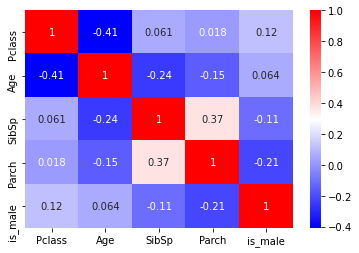

In [238]:
#Dropping non numeric columns and columns with continuous data that will be hard to match with during the loop.
#It would be difficult to use fare here, because matching two different rows on the cost of a ticket down to the penny is not likely.
sns.heatmap(combined.drop(["Survived", "Name", "PassengerId","Fare", "Sex", "Ticket", "Embarked"], axis=1).corr(),cmap = "bwr", annot = True)

There is not a strong correlation between age and sex. There is a strong correlation between age and pclass, sibsp,and parch. Therefore, these features will be my predictors for age in rows where age is missing.

In [239]:
missing_ages = combined[combined['Age'].isnull()]
missing_age_indices = list(missing_ages.index)

for index in missing_age_indices:
    median_age = combined["Age"].median()
    # Filtering for all rows in the age column from the combined dataframe where the number of siblings,
    # parents and children, as well as p class are the same as the current row that is being iterating over. This
    # row comes from the index of rows which have a missing age value. 
    predicted_age = combined["Age"][((combined['SibSp'] == combined.iloc[index]['SibSp'])
                                    &(combined['Parch'] == combined.iloc[index]['Parch'])
                                    &(combined['Pclass'] == combined.iloc[index]['Pclass']))].median()
    #If there is no match between the features of the row that is being iterated over and the rows in the rest
    #of the data set, then set the missing value to the median age. 
    if np.isnan(predicted_age):
        combined["Age"].iloc[index] = median_age
    else:
        combined["Age"].iloc[index] = predicted_age

#### Fare 
There is a single missing value in the fare column. Since, there is only one row with a missing value I will simply impute the middle fare value of the data set. It's best to use the median in this case, because it is more forgiving when dealing with data that has the potential to have large outliers. The sky is the limit for the cost of a ticket. 




In [240]:
combined["Fare"].fillna(combined["Fare"].median(), inplace = True)

#### Embarked
There are two missing values in embarked. I will fill in those missing values with the most frequent value in the dataset.



In [241]:
combined["Embarked"].fillna(combined["Embarked"].mode()[0], inplace = True)

In [242]:
#There are no more missing values in the dataset. 
print(combined.isnull().sum().sort_values())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
is_male          0
Survived       418
dtype: int64


## Hypothesis
 The Survived column shows the fate of each passenger. This is the dependent variable that I am interested in predicting. Although this column contains numeric data, it reperesents catagorical data with the numeral 1 indicating survived and the numeral 0 representing did not survive. Since the model will be predicting if a passenger died or did not die, this is a classification problem.   

The available data provides a measure for sex and socioeconomic status (multiple columns). It is likely that these factors are the main factors that determined if a passenger died or did not die. Other factors worth looking into might be age and family make up. There is likely multicolinearity between some of the independent variables because they look to be related to each other. For example, both ticket fare and Pclass are a measure of socioeconomic status. If mulicolinearity is likely to skew the impact that each of the independent variables have on the dependent variable, than columns will need to be dropped. This might not be a problem for the predictive models, because the relationships between each independent variable and the dependent variables are not as important as the way the entire model performs.


## Descriptive Statistics

In [243]:
combined.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,is_male
count,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,0.383838,2.294882,29.179656,0.498854,0.385027,33.281086,0.644003
std,378.020061,0.486592,0.837836,13.269138,1.041658,0.865560,51.741500,0.478997
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000
50%,655.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200,1.000000
75%,982.000000,1.000000,3.000000,37.000000,1.000000,0.000000,31.275000,1.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000



The above chart provides a quick overview of some statistics. Here is what jumps out to me. 

- Survival Rate of the passengers in this dataset is around 38%
- Average passenger age of this dataset was around 29 years old 
- The average fare in this dataset was \\$33. The max fare was around \\$512. The large difference between the first three quartiles and the max indicates that the data is right skewed. The mean fare is double the median fare! This will need to be looked into further later.
- 64 percent of passengers in this dataset were male. 




### Catagorical Variables

#### Gender and Survival

In [244]:
combined[["Sex", "Survived"]].groupby("Sex", as_index = False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

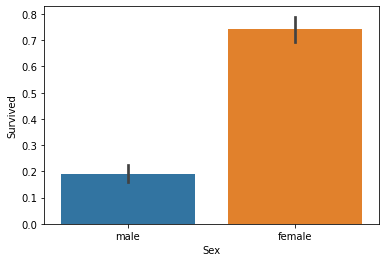

In [245]:
sns.barplot(x = "Sex", y = "Survived", data = combined)

It appears that many more woman in this data set survived this disaster than men. 

#### Passenger Class and Survival


In [246]:
combined[["Pclass", "Survived"]].groupby("Pclass", as_index = False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

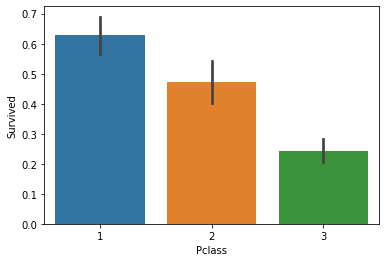

In [247]:
sns.barplot(x = "Pclass", y = "Survived", data = combined)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

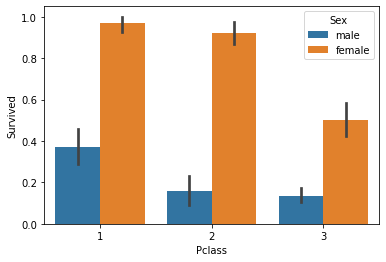

In [248]:
sns.barplot(x = "Pclass", y = "Survived", data = combined, hue = "Sex")

In [249]:
female_only = combined[combined["Sex"] == "female"]
female_only_rich = female_only[female_only["Pclass"] == 1]
female_only_rich.head()
female_only_rich[["Survived", "Parch"]].groupby("Parch", as_index = False).mean()

,Parch,Survived
0,0,0.984375
1,1,1.000000
2,2,0.846154
3,3,NaN
4,4,NaN


[Text(0.5, 0, 'Number of children (first class female only)'),
 Text(0, 0.5, '% Survived')]

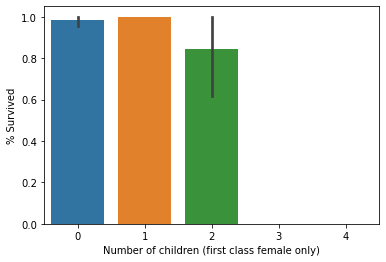

In [250]:
ax = sns.barplot(x = "Parch", y = "Survived", data = female_only_rich)
ax.set(xlabel="Number of children (first class female only)", ylabel = "% Survived")

Overall, 1st class passengers fared signinficanly better over 2nd and 3rd class passengers. 

Overall, 1st class passengers were more likely to survive than to perish.

Overall, 2nd class passengers chance of survival was about a coin toss. 

Overall, 3rd class passengers had a 75% chance of death.

A very clear trend emerges when survival rate is broken down by both Sex and Pclass. All females generally fared better than men regardless of class. Even the lowest class female passengers had a higher chance of survival than first class men. 

1st class passengers that were Female had an over 90% change of Survival

There does not seem to be any clear difference in probability regarding the survival of 1st class females with children vs without.

#### Point of Entry and Survival


In [251]:
combined[["Embarked", "Survived"]].groupby("Embarked", as_index = False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

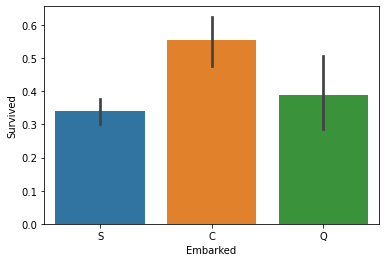

In [252]:
sns.barplot(x = "Embarked", y = "Survived", data = combined)

Of the passengers in the data set, those who embarked at Cherbourg fared better than those who boarded at the other locations. There may be a relation between passenger class and point of entry that can explain the increased likelihood of survival for passengers who embarkd at Cherbourg. To find out I will conduct a Chi squared test for independence.

In [253]:
cross_tab = pd.crosstab(combined.Pclass, combined.Embarked, margins = True)
cross_tab

Embarked,C,Q,S,All
Pclass,,,,
1,141,3,179,323
2,28,7,242,277
3,101,113,495,709
All,270,123,916,1309


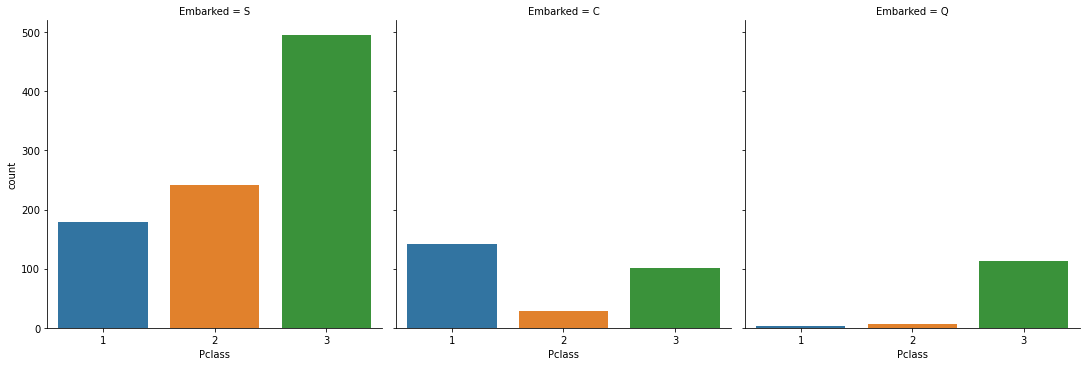

In [254]:
sns.factorplot('Pclass', col = 'Embarked', data = combined, kind = 'count')

From the cross tabulation alone it can be seen that S has more third class passengers than 1st and C has more 1st class passengers than 3rd. 



A chi squared test for independence between Pclass and Embarked shows that it is highly likely these variables are related.

In [255]:
observed_values = np.array([cross_tab.iloc[0][0:3].values, cross_tab.iloc[1][0:3].values, cross_tab.iloc[2][0:3].values])
chi = stats.chi2_contingency(observed_values[0:3])
print("chi squared: {chi}\n pvalue: {pval}\n degrees of freedom: {df}\n".format(chi = chi[0], pval = chi[1], df = chi[2]))

chi squared: 204.48431967559742
 pvalue: 4.0799162291284984e-43
 degrees of freedom: 4



There are two conclusions that can be drawn from the analysis of the relationship between class and embarked. One is that passenger class is likely influencing the correlation between Embarked and Survived. It appears that passenger class is acting as a moderator variable.

## Numerical Variables

Heatmaps or correlation tables are often used to display the relationships between continous data. I will be using Pearson's correlation coeffecient to do this. One of the assumptions of Pearson's correlation coeffecient is that there are no outliers in the dataset. Outliers can also cause problems with the accuracy of predictive models, so I will be removing these using Tukey's method. An overview of the method can be viewed [here](https://www.statisticshowto.com/statistics-basics/find-outliers/). 

In [256]:
#Tukey Fences

#data = dataframe
#n = cut off for the frequencies of outliers found in each row
#columns = columns of interest in df.

def tukey_fences(data, n, columns):
    outlier_indices = []
    for item in columns:
        first_quartile = np.percentile(data[item], 25) 
        third_quartile = np.percentile(data[item], 75)
        inter_quartile_range = third_quartile - first_quartile
        fence = inter_quartile_range * 1.5
        #Creates a list of indeces of each row that has data points that lie either above or below the tukey fence.
        outlier_list = data[(data[item] > third_quartile + fence) | (data[item] < first_quartile - fence)].index
        outlier_indices.extend(outlier_list)
    #Counts the number of times an indices appears in the outlier indices lists.
    indices_count = Counter(outlier_indices)
    #If the indices is counted more than the cuttoff set by the n parameter, it will be added to a new list called multiple outliers.
    cutoff_indices = list(key for key, value in indices_count.items() if value > n)
    return cutoff_indices
    

In [257]:
outlier_indices = tukey_fences(train,2,['Age', 'SibSp', 'Parch', 'Fare'])
combined = combined.drop(outlier_indices, axis = 0).reset_index(drop = True) 


### Numerical Correlation
With the outliers dropped I can check for correlations between the different numerical variables and the survived column. 

<AxesSubplot:>

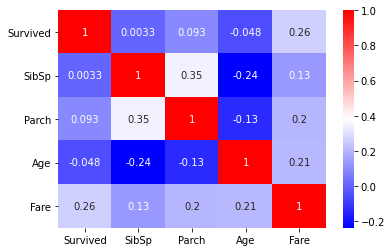

In [258]:
sns.heatmap(combined[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(), annot = True, cmap = "bwr")

Fare has the highest correlation with the Survived column. The rest of the independent variables don't seem very highly correlated with Survived. There does seem to be some correlations between the independent variables though. This could be an issue for some regression models if there is a significant amount of colinearity. I will test for this now.

In [259]:
vifdf = combined[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'is_male']]     

vif_scores = pd.DataFrame()
vif_scores["features"] = vifdf.columns

vif_scores["VIF"] = [variance_inflation_factor(vifdf.values, x) for x in range(len(vifdf.columns))]

vif_scores

,features,VIF
0,Pclass,4.250485
1,Age,4.144098
2,SibSp,1.495838
3,Parch,1.458687
4,Fare,1.765859
5,is_male,2.966084


Luckily, there are no features with a VIF over 5, so there isn't any strong multicolinearity within our data. 
I can proceed without this worry in mind. 

#### Analyis of Fare
Since the only numerical variable that has much of a correlation with survival is the cost payed for a ticket, I will solely focus on this variable during this part of the analysis.  

In [260]:
combined["Fare"].describe()

count    1299.000000
mean       32.555112
std        50.677613
min         0.000000
25%         7.895800
50%        14.454200
75%        30.597900
max       512.329200
Name: Fare, dtype: float64

Again, the descriptive statistics above indicate heavy skewness in the data.

In [261]:
combined["Fare"].mode()

0    8.05
dtype: float64

In [262]:
fare_mode = combined[combined["Fare"] == 8.05]
fare_count = fare_mode["Fare"].count()

fare_count

60

The ticket value of \\$8.05 appeared most in the dataset, though only 60 of the 1299 passengers paid this amount.

In [263]:
combined["Fare"].median()

14.4542

The exact middle ticket value of the dataset was \\$14.45

<AxesSubplot:xlabel='Fare'>

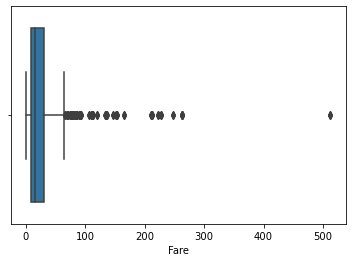

In [264]:
sns.boxplot(combined['Fare'])

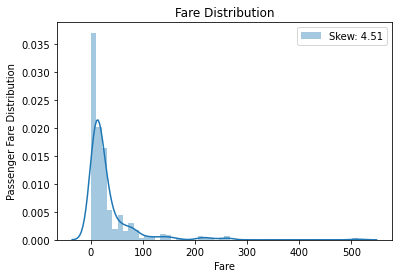

In [265]:
sns.distplot(combined['Fare'], label = 'Skew: {skew:.2f}'.format(skew = combined['Fare'].skew()))
plt.title("Fare Distribution")
plt.ylabel('Passenger Fare Distribution')
plt.legend()

Shown above is the distribution of passenger fare. As suspected, both the distribution plot and box plot show that the data is strongly skewed right. This data will need to be tranformed before training the different machine learning models as it can impact the accuracy of predictions. I will apply log tranformation to fix this issue. 


In [266]:
#Log tranformation to fix skewness
combined["Fare"] = combined["Fare"].map(lambda fare: np.log(fare) if fare > 0 else 0)

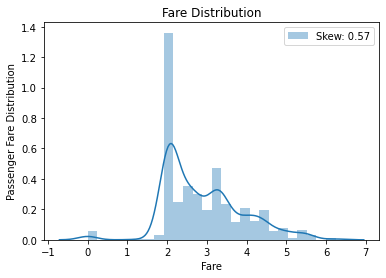

In [267]:
sns.distplot(combined['Fare'], label = 'Skew: {skew:.2f}'.format(skew = combined['Fare'].skew()))
plt.title("Fare Distribution")
plt.ylabel('Passenger Fare Distribution')
plt.legend()